## Telecom Customer Churn Prediction
This notebook is based on <a href="https://www.coursera.org/learn/telecom-customer-churn-prediction">Telecom Customers Churn Predictions</a> case-study with completely changed visualizations, explorations, and optimizations from my side. <br>
The initial 

### Objective
Telecom service providers use customer attrition analysis as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Machine Learning algorithms help companies analyze customer attrition rated based on several factors which includes verious services subscribed by the customers, tenure rate, gender, senior citizen, payment method, and many more. 

### Table of contents
1. Import libraries
2. Exploratory Data Analysis (EDA) <br>
&emsp;2.1 Getting to Know the Dataset <br>
&emsp;2.2 Data Visualization <br>
&emsp;&emsp;&emsp;2.2.1 Overall Distributions <br>
&emsp;&emsp;&emsp;2.2.2 Target Distribution <br>
&emsp;&emsp;&emsp;2.2.3 Correlation Matrix & Aesthetics<br>
&emsp;&emsp;&emsp;2.2.4 Answering the Questions <br>
&emsp;2.3 RandomForestClassifier's Feature Importance <br>
&emsp;2.4 PCA vs RFE<br>
3. Data Preprocessing








4. Data Preparation
5. Train and Evaluate a Logistic Regression model
6. Train and Evaluate a Support Vector Machine Model
7. Train and Evaluate a Random Forest Classifier model
8. Train and Evaluate a K-Nearest Neighbor model
9. Train and Evaluate a Naive Bayes Classifier model
10. Compare the trained models by calculating AUC score and plot ROC curve


### Target
In our case, the target variable is the last column, class, which shows whether the customer was retained.
- 0 - corresponds to the client being retained
- 1 - corresponds to the client's leaving

## STEP 1: Import libraries

In [36]:
# import custom packages
from custom_packages import visualizations as vis

# import the essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the algorithms that will be used 
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

# import the supporting packages 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve

# import additional packages for visualization
import plotly.express as px  # interactive data visualization
import plotly.graph_objects as go
import cufflinks as cf # works as a connector between the pandas library and plotly
cf.go_offline()

# set the themes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# !pip install cufflinks    # uncomment in case the package is not downloaded 

# set inline visuals
%matplotlib inline 

## Step 2: Exploratory Data Analysis (EDA)

### 2.1 Getting to Know the Dataset
In this section, we will read the csv file, check the dimensions and missing values, and look into the structure. As we see below, this dataset consists of 20 feature and 1 target columns. Is there a correlation between states people leave in and phone provider switch? Do international calls cause such outcome? Do quitters spend more on phone plans? Do people need bigger day or evening plans? How much time do discontinued people spend talking on the phone throughout the day? <br>
Answers to the aforementioned questions are at the end of this section.


In [39]:
telecom_df = pd.read_csv('datasets/telecom_churn.csv')           # read the csv file
print(f'Dataset\'s dimensions: {telecom_df.shape}')              # check the dimensions
print(f'Any missing values? {np.any(telecom_df.isna().sum())}')  # check whether they're any missing values
print(f'Columns: {", ".join(telecom_df.columns.to_list())}')     # get the column names

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/telecom_churn.csv'

In [3]:
# check first rows
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
# check the statistical summary 
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### 2.2 Data Visualization
As we see above, first look at the dataset hasn't revealed any abnormalities. In order to make sure that everything is indeed alright, we need to further visualize it.
<b>Data Visualization</b> is the crucial part that needs the most attention. We cannot jump to model instantiation and outcomes without this step.

#### 2.2.1 Overall distributions
This section includes some basic distribution visualizations. 

c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



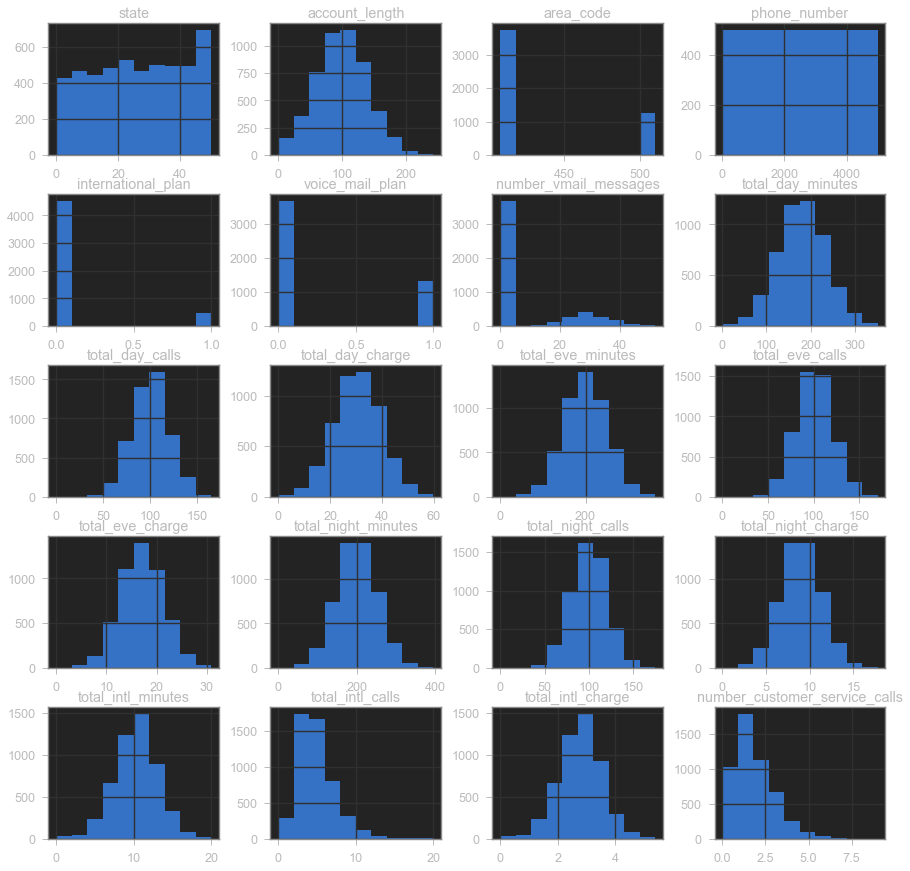

In [5]:
# visualize the distribution of the whole dataset
telecom_df.drop('class', axis=1).hist(figsize=(15, 15))
plt.show()

#### 2.2.2 Target Distribution
In order to see the distribution of the target column, we need to see what will be classified. Using the interactive library, Plotly, we are given the flexibility to interact with the results.

In [37]:
# plot pie chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

# prepare the values to plot
labels = ['Stayed (0)', 'Left (1)']                    # create the variables to plot 
values = telecom_df['class'].value_counts().to_list()  # get their distribution

# create a donut-shaped representation
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Target: Customer segmentation', width=500, height=400)
fig.show()

#### 2.2.3 Correlation Matrix & Aesthetics
<b>Correlation Matrix</b> is a common technique that shows how columns are correlated with each other. They can be too cumbersome, therefore I prefer using partial (triangular) and column-wise versions. <br>
<b>Triangular correlation matrix</b> creates a mask to show only half of it. There is a redundancy when creating a whole matrix, therefore it is a good practice for both efficiency and readability. <br>
<b>Sorted-Column correlation</b> creates a features-to-target correlation only. It does not support feature-to-feature correlation.

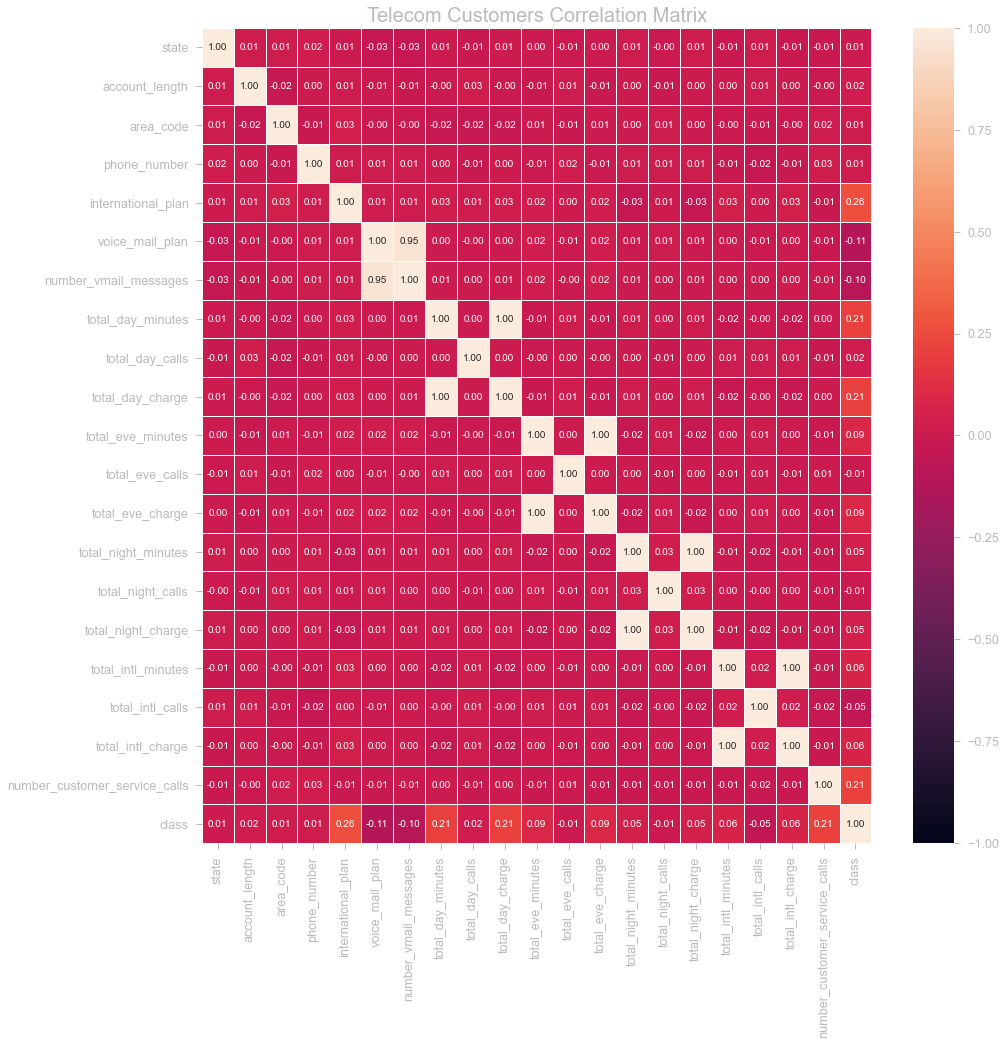

In [7]:
# correlation matrix
corr_matrix = telecom_df.corr()                                  # create the correlation matrix                       
plt.figure(figsize=(15, 15))                                     # instantiate the figure size
sns.heatmap(corr_matrix, vmin=-1, vmax=1,                        # create a heatmap with the precision of two decimal places
            linewidths=.5, annot=True, fmt='.2f')
plt.title('Telecom Customers Correlation Matrix', fontsize=20)   # create the title
plt.show()                                                       # show the results

#### Aesthetics: Triangular & Sorted-Column Correlation Matrices

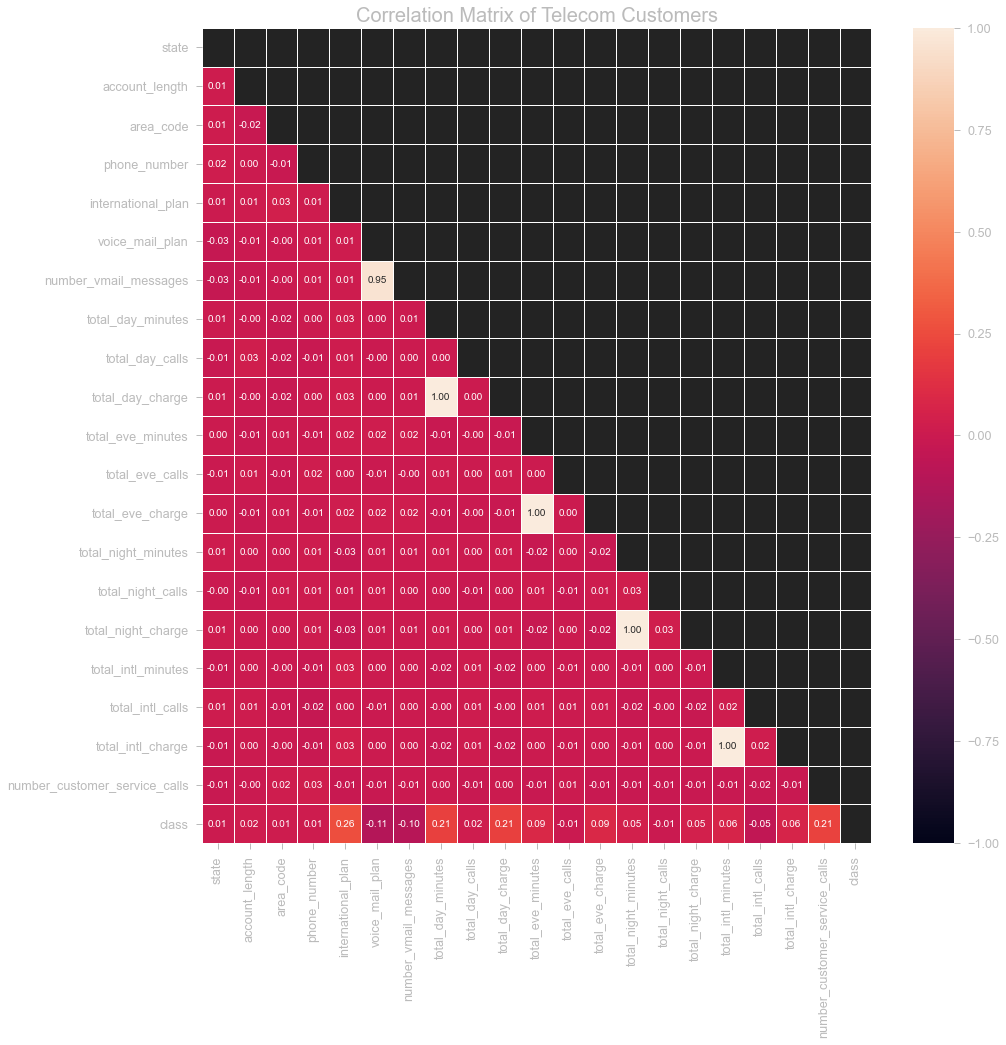

In [8]:
# Triangular Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask=np.triu(corr_matrix), vmin=-1, vmax=1, linewidths=.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Telecom Customers', fontsize=20)
plt.show()

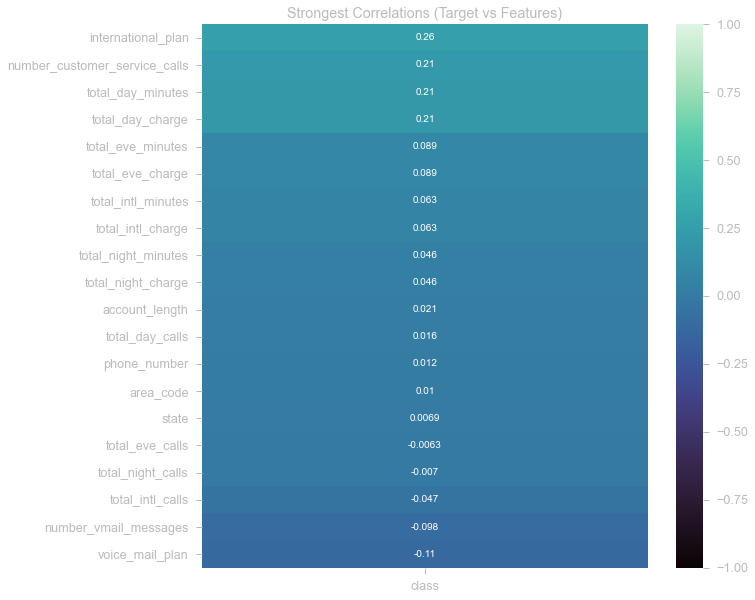

In [9]:
# sorted-column representation
plt.figure(figsize=(10, 10))
plt.title('Strongest Correlations (Target vs Features)')
sns.heatmap(telecom_df.corr()[['class']].sort_values(by='class', ascending=False)[1:], 
            annot=True, vmin=-1, vmax=1, cmap='mako')
plt.show()

#### 2.2.4 Answering the questions



- Is there a correlation between states people leave in and phone provider switch? 

<b>Answer</b>: as we see above, correlation between states and churn is minimal, only 0.69%. To say for sure, we will look at feature importance in the next section. 

- Do international calls cause such outcome? 

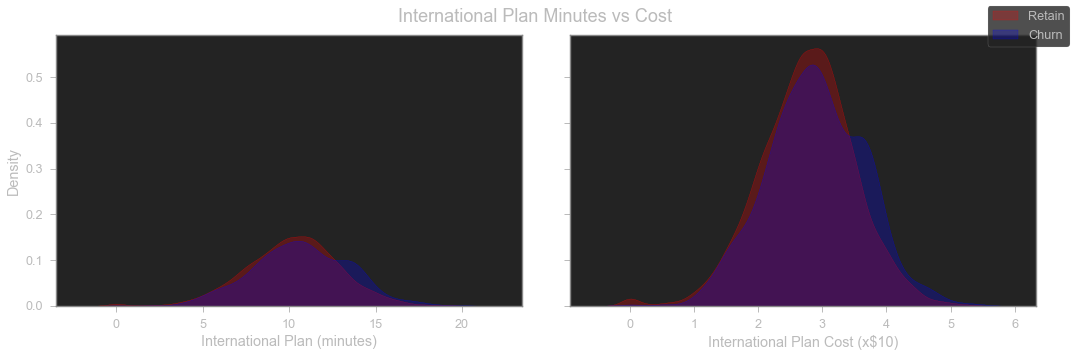

In [10]:
# Do international calls cause such outcome?
vis.get_kde_results(telecom_df, 'International Plan Minutes vs Cost',
                'total_intl_minutes', 'International Plan (minutes)',
                'total_intl_charge', 'International Plan Cost (x$10)')

- Do people need bigger day or evening plans?

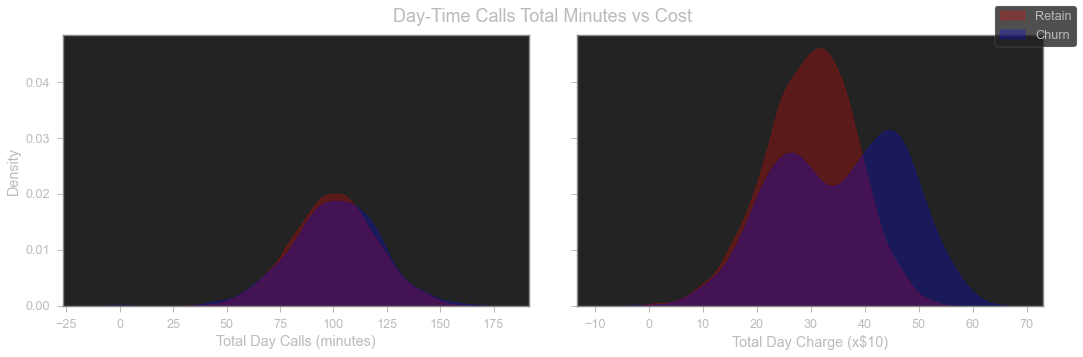

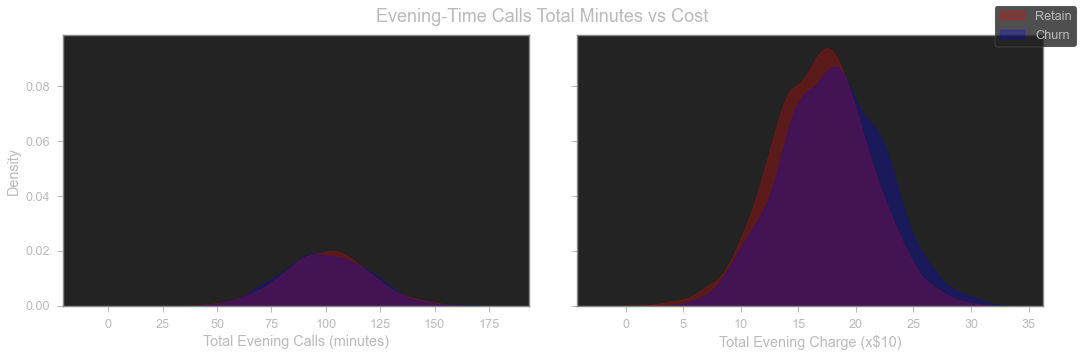

In [11]:
# during the day
vis.get_kde_results(telecom_df, 'Day-Time Calls Total Minutes vs Cost',
                'total_day_calls', 'Total Day Calls (minutes)',
                'total_day_charge', 'Total Day Charge (x$10)')

# during the evening
vis.get_kde_results(telecom_df, 'Evening-Time Calls Total Minutes vs Cost',
                'total_eve_calls', 'Total Evening Calls (minutes)',
                'total_eve_charge', 'Total Evening Charge (x$10)')

- Do quitters spend more on phone plans?

- How much time do discontinued people spend talking on the phone throughout the day?

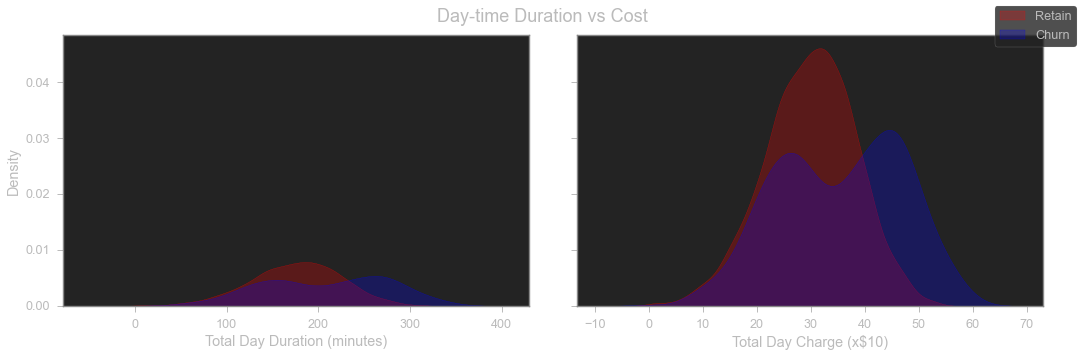

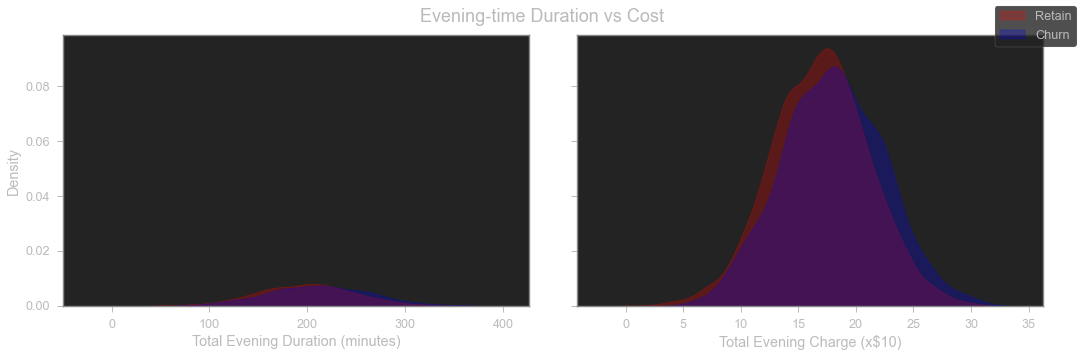

In [12]:
vis.get_kde_results(telecom_df, 'Day-time Duration vs Cost',
                'total_day_minutes', 'Total Day Duration (minutes)',
                'total_day_charge', 'Total Day Charge (x$10)')


vis.get_kde_results(telecom_df, 'Evening-time Duration vs Cost',
                'total_eve_minutes', 'Total Evening Duration (minutes)',
                'total_eve_charge', 'Total Evening Charge (x$10)')

### 2.3 RandomForestClassifier's Feature Importance

add description & reasons

In [13]:
X = telecom_df.drop('class', axis=1)
y = telecom_df['class']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y)

print(f'Train shape: {X_train.shape}, {y_train.shape}')
print(f'Test shape:  {X_test.shape}, {y_test.shape}')

Train shape: (3750, 20), (3750,)
Test shape:  (1250, 20), (1250,)


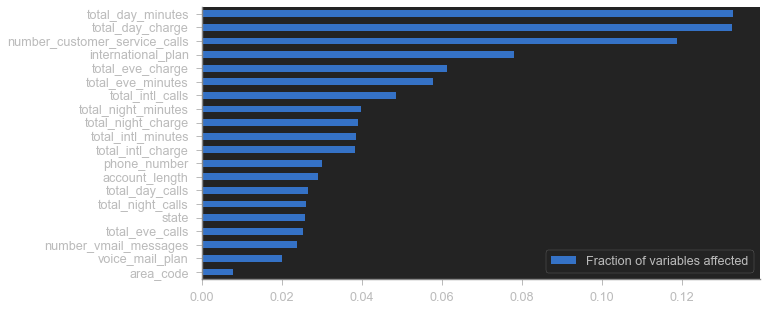

In [14]:
rfc = RandomForestClassifier().fit(X_train, y_train.values.ravel())
feature_scores = pd.DataFrame({'Fraction of variables affected': rfc.feature_importances_}, index=X.columns)
feature_scores = feature_scores.sort_values(by='Fraction of variables affected')
feature_scores.plot(kind='barh', figsize=(10,5))
sns.despine()

### 2.3 PCA vs RFE
#### PCA 
<b>Rule of thumb</b>: correlations should be > 30%. In our case all the correlations are less than 10%, therefore it will not work properly. Let's try to run it and see the results.

#### RFE





In [38]:
print('\t\tOverall Correlation')
print(np.mean(telecom_df.corr()))

scaler = StandardScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.fit_transform(X_test)

vis.get_pca_results(normalized_X_train, X.columns)


		Overall Correlation
state                            0.047749
account_length                   0.049378
area_code                        0.046769
phone_number                     0.051259
international_plan               0.069611
voice_mail_plan                  0.089389
number_vmail_messages            0.090126
total_day_minutes                0.105324
total_day_calls                  0.049580
total_day_charge                 0.105323
total_eve_minutes                0.100166
total_eve_calls                  0.048213
total_eve_charge                 0.100166
total_night_minutes              0.096861
total_night_calls                0.051805
total_night_charge               0.096858
total_intl_minutes               0.097139
total_intl_calls                 0.045069
total_intl_charge                0.097157
number_customer_service_calls    0.053204
class                            0.099139
dtype: float64
